# Data Import and Library

In [4]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [5]:
flight_data = pd.read_excel(r"C:\Users\SIDDHANT SHELKE\Downloads\Flight_Price_Train.xlsx")


## a. Top 5 records

In [6]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## b. Data shape

In [7]:
shape_of_data = flight_data.shape
print("Shape of the dataset:", shape_of_data)

Shape of the dataset: (10683, 11)


## c. Data statistical

In [8]:
statistical_info = flight_data.describe()
print("Statistical information:")
print(statistical_info)

Statistical information:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


## d. Data info

In [9]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## e. Data duplicates

In [10]:
duplicates = flight_data[flight_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 220


In [11]:
# Drop duplicates
flight_data.drop_duplicates(inplace=True)

# Confirming duplicates have been removed
print("Number of duplicate rows after removal:", flight_data[flight_data.duplicated()].shape[0])


Number of duplicate rows after removal: 0


## f. Data Null values

In [12]:
null_values = flight_data.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [13]:
# Drop rows with any null values
flight_data.dropna(inplace=True)

# Confirming null values have been handled
print("Null values in each column after handling:")
print(flight_data.isnull().sum())

Null values in each column after handling:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


## g. Extract Date, Month, Year from Date of Journey column

In [14]:
# Convert 'Date_of_Journey' to datetime format
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'], format='%d/%m/%Y')

# Extract Date, Month, and Year into separate columns
flight_data['Journey_Day'] = flight_data['Date_of_Journey'].dt.day
flight_data['Journey_Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Journey_Year'] = flight_data['Date_of_Journey'].dt.year

# Display the updated DataFrame with extracted columns
print(flight_data[['Date_of_Journey', 'Journey_Day', 'Journey_Month', 'Journey_Year']].head())


  Date_of_Journey  Journey_Day  Journey_Month  Journey_Year
0      2019-03-24           24              3          2019
1      2019-05-01            1              5          2019
2      2019-06-09            9              6          2019
3      2019-05-12           12              5          2019
4      2019-03-01            1              3          2019


# Removing Outliner

<Axes: >

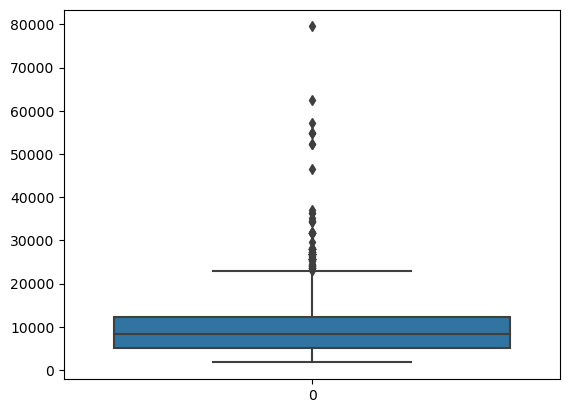

In [15]:
sns.boxplot(data=flight_data['Price'])

In [16]:

# for x in flight_data. :
q1,q2,q3 = flight_data['Price'].quantile([0.25,0.50,0.75])
iqr = q3 - q1
ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr
flight_data['Price'].clip(lower=ll,upper=ul,inplace=True);

<Axes: >

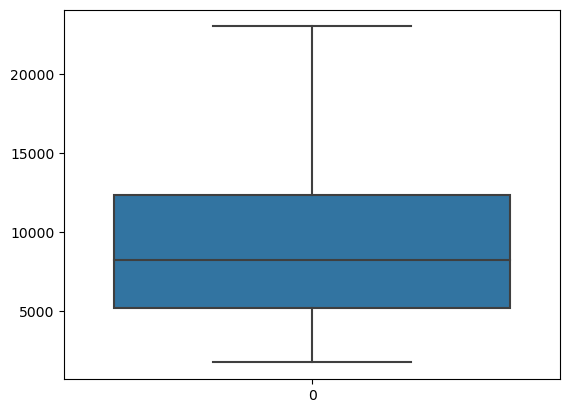

In [17]:
sns.boxplot(data=flight_data['Price'])

In [18]:
# Convert Departure Time
flight_data['Dep_Time'] = pd.to_datetime(flight_data['Dep_Time']).dt.time

# Extract hour and minute
flight_data['dep_hour'] = pd.to_datetime(flight_data['Dep_Time'], errors='coerce').dt.hour
flight_data['dep_minute'] = pd.to_datetime(flight_data['Dep_Time'], errors='coerce').dt.minute


In [19]:
# Clean Arrival Time
flight_data['Arrival_Time'] = flight_data['Arrival_Time'].apply(lambda x: x.split(' ')[0])
flight_data['Arrival_Time'] = pd.to_datetime(flight_data['Arrival_Time'], errors='coerce').dt.time

# Extract hour and minute
flight_data['arrival_hour'] = pd.to_datetime(flight_data['Arrival_Time'], errors='coerce').dt.hour
flight_data['arrival_minute'] = pd.to_datetime(flight_data['Arrival_Time'], errors='coerce').dt.minute


In [20]:
# Fix missing hours/minutes
flight_data['Duration'] = flight_data['Duration'].apply(lambda x: '0h ' + x if 'h' not in x else x)
flight_data['Duration'] = flight_data['Duration'].apply(lambda x: x + ' 0m' if 'm' not in x else x)

# Extract hours and minutes
flight_data['duration_hours'] = flight_data['Duration'].apply(lambda x: int(x.split('h')[0]))
flight_data['duration_minutes'] = flight_data['Duration'].apply(lambda x: int(x.split('h')[1].split('m')[0]))

# Drop original Duration
flight_data.drop('Duration', axis=1, inplace=True)


In [21]:
flight_data.columns = flight_data.columns.str.lower().str.replace(" ", "_")


In [22]:
flight_data.info()
flight_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   airline           10462 non-null  object        
 1   date_of_journey   10462 non-null  datetime64[ns]
 2   source            10462 non-null  object        
 3   destination       10462 non-null  object        
 4   route             10462 non-null  object        
 5   dep_time          10462 non-null  object        
 6   arrival_time      10462 non-null  object        
 7   total_stops       10462 non-null  object        
 8   additional_info   10462 non-null  object        
 9   price             10462 non-null  float64       
 10  journey_day       10462 non-null  int64         
 11  journey_month     10462 non-null  int64         
 12  journey_year      10462 non-null  int64         
 13  dep_hour          0 non-null      float64       
 14  dep_minute        0 no

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,total_stops,additional_info,price,journey_day,journey_month,journey_year,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,non-stop,No info,3897.0,24,3,2019,NaN,NaN,NaN,NaN,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,2 stops,No info,7662.0,1,5,2019,NaN,NaN,NaN,NaN,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,2 stops,No info,13882.0,9,6,2019,NaN,NaN,NaN,NaN,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,1 stop,No info,6218.0,12,5,2019,NaN,NaN,NaN,NaN,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,1 stop,No info,13302.0,1,3,2019,NaN,NaN,NaN,NaN,4,45


In [23]:
flight_data.to_csv('flight_data_cleaned.csv', index=False)
